In [141]:
# Import 
import pandas as pd
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [125]:
# Dataset : self-made dataset
df2 = pd.read_excel("Logistic.xlsx")

In [126]:
# Remove Last two rows as these are the noise only
df2

,Sample,Height,Weight,Age,Gender
0,1,5.70,68,22,Male
1,2,5.60,67,29,Male
2,3,5.60,52,23,Female
3,4,5.90,80,26,Male
4,5,5.50,70,30,Male
5,6,5.00,54,29,female
6,7,5.50,70,22,Male
7,8,5.10,82,25,male
8,9,5.20,54,25,female
9,10,6.00,73,22,Male


In [127]:
df2.Weight = df2.Weight.astype(float)

In [128]:
# Convert Gender column data type as String for easy Processing in next step.
df2.Gender.astype(str)

0       Male
1       Male
2     Female
3       Male
4       Male
5     female
6       Male
7       male
8     female
9       Male
10      male
11    female
12      male
13      male
14      Male
15    Female
16      Male
17      Male
18      Male
19    female
20    Female
21      Male
22    Female
23    Female
24      Male
Name: Gender, dtype: object

In [6]:
# Make all wordds in gender column of same case, let it be Upper Case
df2['Gender'] = df2['Gender'].apply(lambda x: x.upper())

In [129]:
LE = LabelEncoder()
df2['Gender'] = LE.fit_transform(df2['Gender'])

# 1 = Male
# 0 = Female

In [130]:
# Now need to convert all data items of Gender to float type
df2.gender = df2.Gender.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [131]:
X = df2[['Height','Weight']]
y = df2['Gender']

# in X - independent variables
# one more column of 1's is added
# to consider intercept value in weight matrix as weight
X = np.c_[np.ones((X.shape[0], 1)), X]

y = (coefficients).Transpose * (varaibles)

as intercept is coefficient without any associated variable.   
so to include that column of 1's is added in the variable matrix.  

Model Training

Model training is essentially minimization of the loss function. 
Loss function is Binary Cross-Entropy Loss Function  
We achieve that with the Gradient Descent technique, which can be broken into a few steps:

1. First, we find derivatives of the loss function with respect to each weight. Derivatives can tell which direction and by how much we should change weight to make the model loss a bit smaller.  
2. Updating each weight according to derivative until the local minimum is found, i.e. model doesn’t improve anymore so we can stop

In [135]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    # log loss
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    # epochs = iterations
    def fit(self, X, y, epochs=100, lr=0.05):        
        loss = []

        weights = rand(X.shape[1])  # select weights.no_of_column = X.no_of_column
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            # X and weights are two matrix that are model_selectors and x variables respectively
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
        self.weights = weights
        self.loss = loss
        return self.loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        # if value is greater than 0.5 - it belongs to class value 1 
        # and if less than belongs to class value 0
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [153]:
p = LogisticRegression()
a = p.fit(X_train,y_train, epochs=200, lr=0.002)

In [155]:
y_pred = p.predict(X_test)

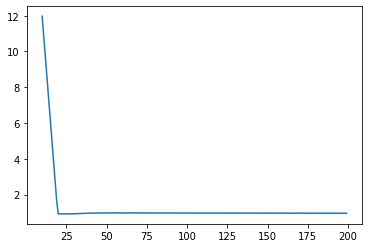

In [154]:
# Loss for each iteration
plt.plot(a)

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.25      0.33         4

    accuracy                           0.20         5
   macro avg       0.25      0.12      0.17         5
weighted avg       0.40      0.20      0.27         5

